# Decision Tree Regression

## Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [10]:
dataset = pd.read_csv('diabetes_data_upload.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

##Data Preprocessing

In [12]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X[:, 1:] = encoder.fit_transform(X[:, 1:])

In [13]:
print(X[:10])

[[40 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 1.0]
 [58 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0]
 [41 1.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0]
 [45 1.0 0.0 0.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0]
 [60 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [55 1.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 1.0 1.0]
 [57 1.0 1.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0]
 [66 1.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0]
 [67 1.0 1.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0]
 [70 1.0 0.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0]]


In [14]:
y = y.reshape(len(y), 1)
y = encoder.fit_transform(y)

In [15]:
print(y[:10])

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Decision Tree Regression model on the Training set

In [17]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [27]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
results = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(results[:10])

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


## Evaluating the Model Performance

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.878125

##Determining Percentage Acuracy on Test Results


In [20]:
def accuracy(x_test, y_test, y_pred):
    correct = 0
    for i in range(len(y_pred)):
        if np.round(y_pred[i]) == y_test[i]:
            correct += 1
    accuracy = (correct / len(y_pred)) * 100
    return accuracy

accuracy_score = accuracy(X_test, y_test, y_pred)
print(f"Accuracy: {accuracy_score}%")

Accuracy: 97.11538461538461%


##Visualising the results

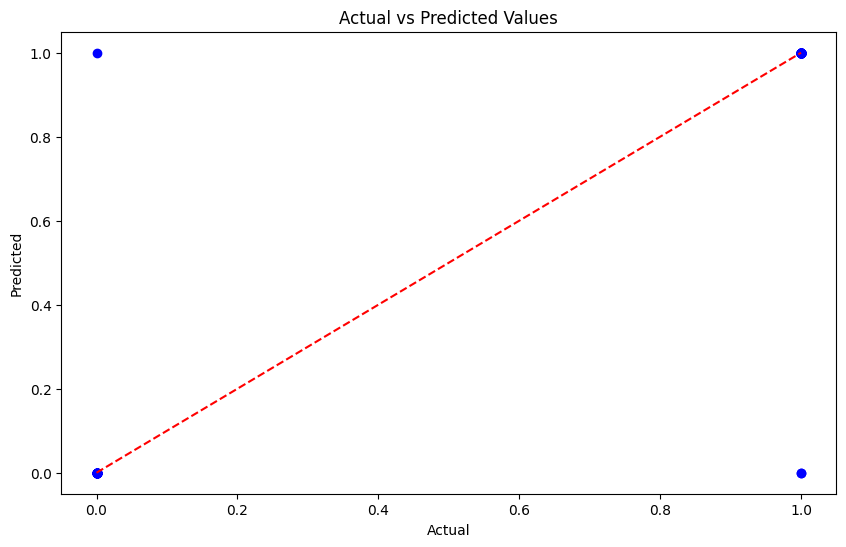

In [22]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([0, 1], [0, 1], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

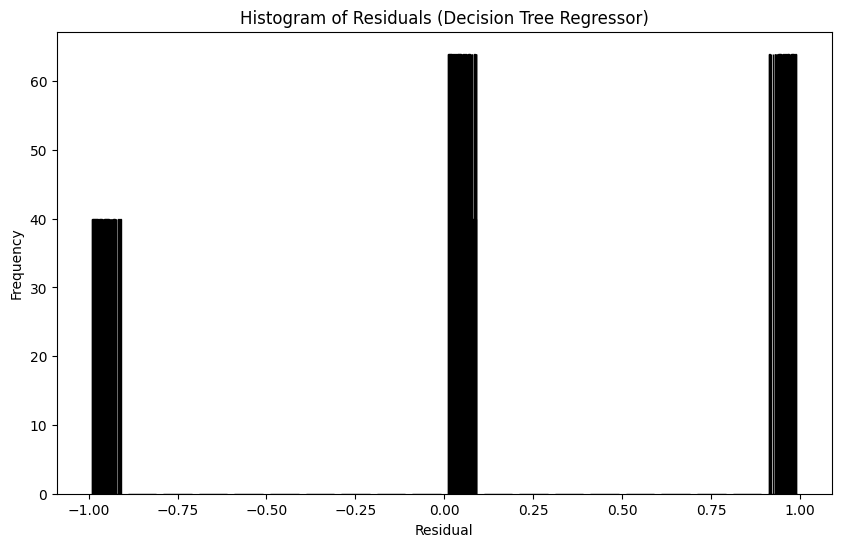

In [24]:
# Histogram of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Decision Tree Regressor)')
plt.show()

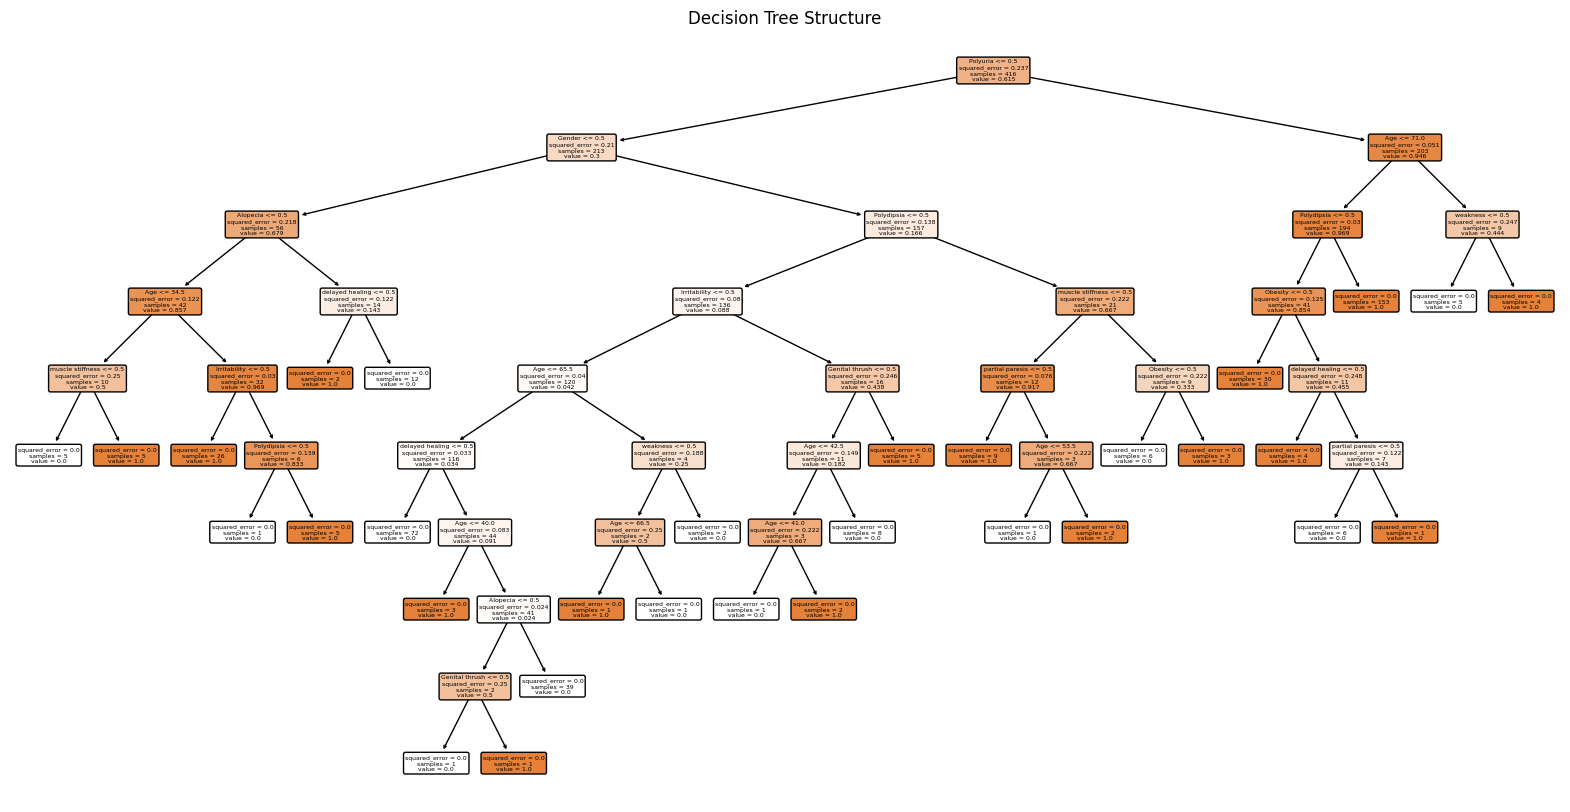

In [26]:
# Visualize the tree structure
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(regressor, filled=True, feature_names=dataset.columns[:-1], rounded=True)
plt.title('Decision Tree Structure')
plt.show()